 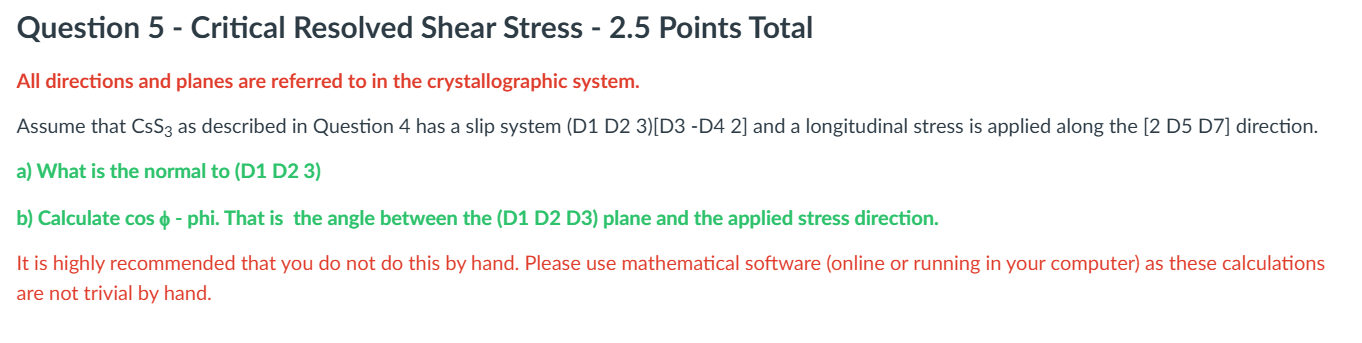

In [1]:

#UFID: 8 0 7 7 3 6 5 3  D1 D2 D3 D4 D5 D6 D7 D8
#another approach using def(angle):
import numpy as np
import math

x = input("Enter your eight digit UFID:/n")
if len(x)!=8 or not x.isdigit():
    raise ValueError    

D=[]

for d in x:
    D.append(int(d))

#print("Your UFID is:\n",D)

D1 = D[0]
D2 = D[1]
D3 = D[2]
D4 = D[3]
D5 = D[4]
D6 = D[5]
D7 = D[6]
D8 = D[7]

#Lattice parameters
# Lattice parameters
a = 0.475 #in nanometer
b = 0.932 #in nanometer
c = 1.165 #in nanometer
# Angles
alpha = 95.07
beta = 95.31
gamma = 89.60

#slip system
plane = np.array([D1,D2,3])  # Slip plane
slip= np.array([D3,-D4,2])  # Slip direction
load= np.array([2,D5,D7])  # Direction of applied stress
# Metric tensor (G matrix)
G = np.array([
    [a**2, a * b * math.cos(math.radians(gamma)), a * c * math.cos(math.radians(beta))],
    [b * a * math.cos(math.radians(gamma)), b**2, b * c * math.cos(math.radians(alpha))],
    [c * a * math.cos(math.radians(beta)), c * b * math.cos(math.radians(alpha)), c**2]
])

# Inverse metric tensor
G_inv = np.linalg.inv(G)
#print(G_inv)

#P_N = np.matmul(plane,G_inv)
#print(P_N)

# Transforming t2 using the inverse metric tensor
plane_normal = np.dot(plane, G_inv)
print(f"part:a,The plane normal for the given {plane}=(D1 D2 3) is:\n",plane_normal)

#dot product calculation
def angle(v1,G,v2):
    numerator = np.dot(np.dot(v1,G),v2.T)
    denomenator = math.sqrt(np.dot(np.dot(v1,G),v1.T))*math.sqrt(np.dot(np.dot(v2,G),v2.T))

    return numerator/denomenator

#phi = angle(plane_normal,G,load)
#lamda = angle(slip,G,load)

#scmid = phi*lamda

#print(f"The angle between the plane normal of {plane} = (D1 D2 3) plane and the loading direction {load} = [2 D5 D7] is:\n",phi)
#print(f"The angle between the slip direction {slip} and the loading direction {load} is:\n",lamda)

#printing the scmid factor
#print(f"The Schmid factor for the given system is:\n",scmid)

#Now, we want to find the angle phi between (D1 D2 D3) plane and loading direction. So, for that we need to find the normal of the plane
new_plane = np.array([D1, D2, D3])

#normal of new_plane
p_inv = np.matmul(new_plane,G_inv)

#phi calculation

Phi = angle(p_inv,G,load)

print(f"part:b,The angle phi between the plane {(new_plane)}= (D1 D2 D3) and the applied stress direction {load}= [2 D5 D7] is:\n",Phi)

part:a,The plane normal for the given [8 0 3]=(D1 D2 3) is:
 [36.27003629  0.26839871  3.59793366]
part:b,The angle phi between the plane [8 0 7]= (D1 D2 D3) and the applied stress direction [2 3 5]= [2 D5 D7] is:
 0.4429986173126964
